# Visualizing Loans Awarded by Kiva

In this project we'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, we'll explore the average loan amount by country using aggregated bar charts. We'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.

## Step 1: Import Necessary Python Modules
Import the modules that we'll be using in this project.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

## Step 2: Ingest The Data
Load **kiva_data.csv** into a DataFrame called `df`. Then, inspect the DataFrame using `.head()`.

In [2]:
df = pd.read_csv('kiva_data.csv')
df.sort_values('country', inplace = True)
print(df.head())

#Look at the descriptive statistics for the loan amount
print(df.loan_amount.describe())

       loan_amount               activity   country  gender
13214          425  Food Production/Sales  Cambodia  female
13230          375  Food Production/Sales  Cambodia  female
13231         1000  Food Production/Sales  Cambodia    male
13232          600  Food Production/Sales  Cambodia    male
13233          500  Food Production/Sales  Cambodia  female
count    65499.000000
mean       361.627277
std        194.798936
min         50.000000
25%        225.000000
50%        325.000000
75%        450.000000
max       1000.000000
Name: loan_amount, dtype: float64


   gender  loan_amount
0  female        61632
1    male         3867


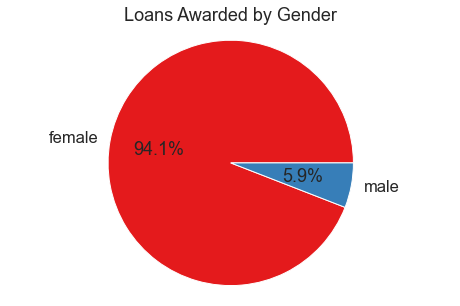

In [12]:
#Look at breakdown by gender
gender = df.groupby('gender').loan_amount.count().reset_index()
print(gender)

# Set style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.5, palette = 'Set1')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(gender.loan_amount, labels=gender.gender, autopct = '%0.1f%%')
plt.axis('equal')
plt.title('Loans Awarded by Gender')

# Save the figure as a .png file
plt.savefig('img_1_loans_by_gender')

plt.show()

       country  gender  loan_amount
0     Cambodia  female           93
1     Cambodia    male           75
2  El Salvador  female         5480
3  El Salvador    male          692
4        Kenya  female         4943
5        Kenya    male         2157
6     Pakistan  female         1732
7     Pakistan    male           54
8  Philippines  female        49384
9  Philippines    male          889


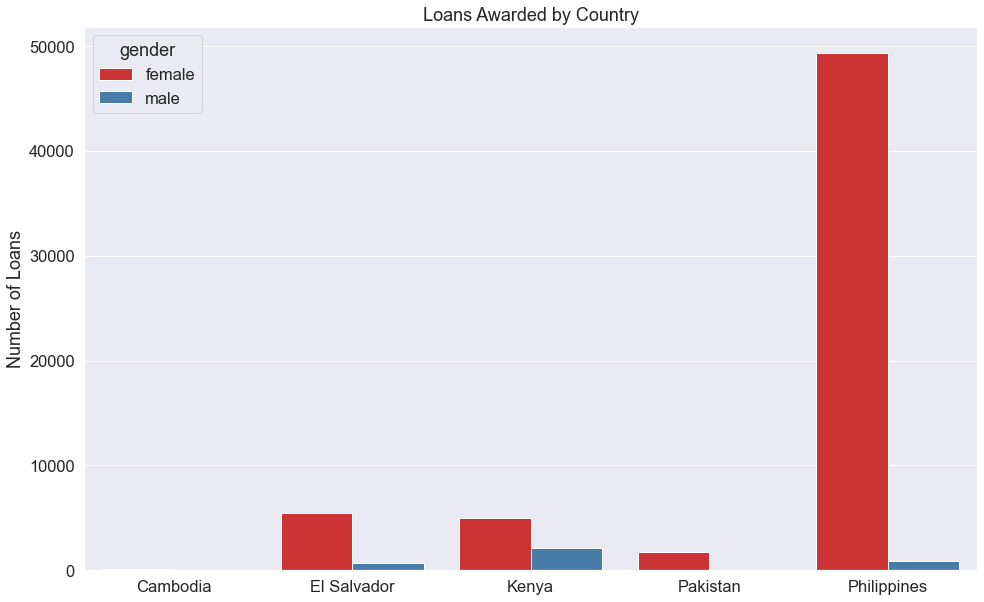

In [14]:
#Look at breakdown by country
country = df.groupby(['country', 'gender']).loan_amount.count().reset_index()
print(country)

# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(data = country, x="country", y="loan_amount", hue = "gender")
plt.title('Loans Awarded by Country')
ax.set(xlabel=None)
ax.set_ylabel('Number of Loans')

fig.savefig('img_2_loans_by_country')

## Step 3: Bar Charts

We'll create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country. We'll add the hue parameter to the barplot and set it so that the visualization includes the nested category of gender.

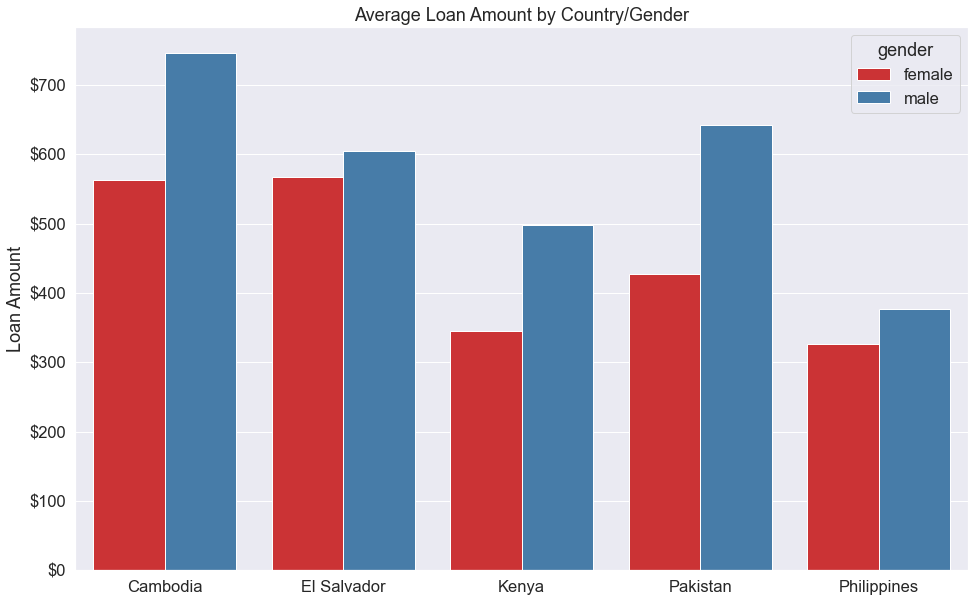

In [11]:
# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(16, 10))

# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x="country", y="loan_amount", hue = 'gender', ci = None)

# Label the axes and give a title
ax.set_title("Average Loan Amount by Country/Gender")
ax.set(xlabel=None)
ax.set_ylabel("Loan Amount")

# Edit the tick labels on the y-axis so that they include dollar signs.
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Save the figure as a .png file
plt.savefig('img_3_bar_plot_by_country.png')

## Step 4: Box Plots With Kiva Data

So far, we have visualized the average size of loans by country using bar charts; now we are going to make a box plot to compare the distribution of loans by country.

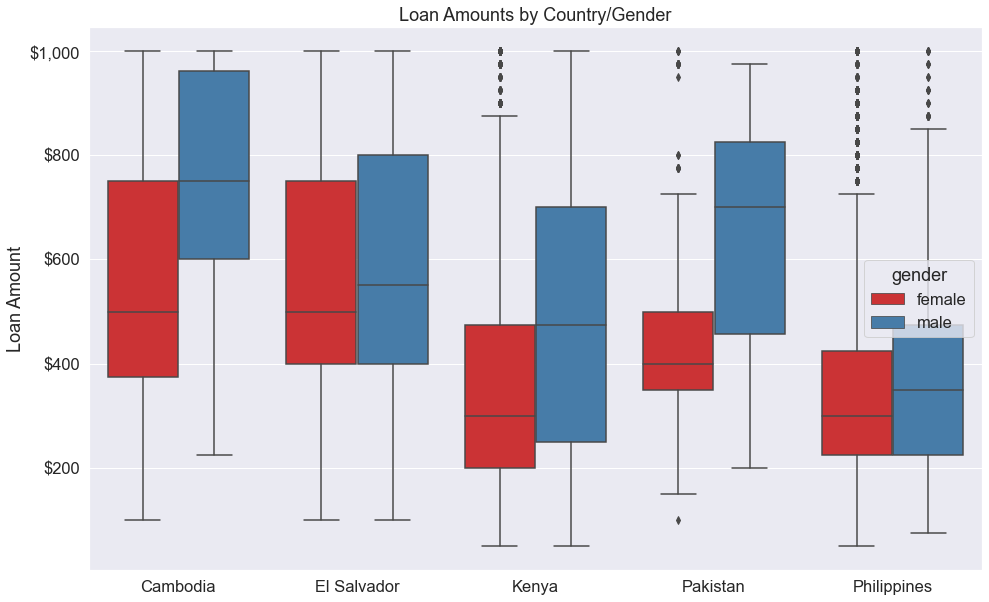

In [6]:
# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 10))

# Use Seaborn to create the box plot
ax = sns.boxplot(data = df, x = 'country', y = 'loan_amount', hue = 'gender')

# Label the axes and give a title
ax.set_title("Loan Amounts by Country/Gender")
ax.set(xlabel=None)
ax.set_ylabel("Loan Amount")

# Edit the tick labels on the y-axis so that they include dollar signs.
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Save the figure as a .png file
plt.savefig('img_4_box_plot_by_country.png')

## Step 5: Box Plot by Activity

Instead of visualizing the loan amount by *country*, we'll use `sns.boxplot()` to plot the loan amount by *activity*.

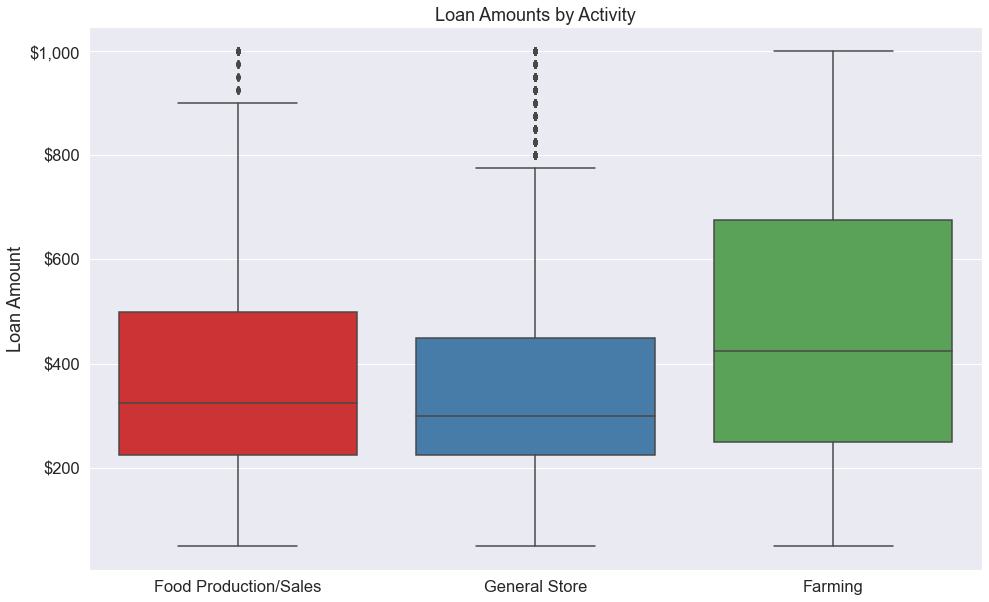

In [17]:
# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(16, 10))

# Use Seaborn to create the box plot
ax = sns.boxplot(data=df, x="activity", y="loan_amount")

# Label the y-axis and give a title
ax.set_title("Loan Amounts by Activity")
ax.set(xlabel=None)
ax.set_ylabel("Loan Amount")

# Edit the tick labels on the y-axis so that they include dollar signs.
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Save the figure as a .png file
plt.savefig('img_5_box_plot_by_activity.png')

## Step 6: Violin Plots

### Create a violin plot that visualizes the distribution of loan amount by activity.

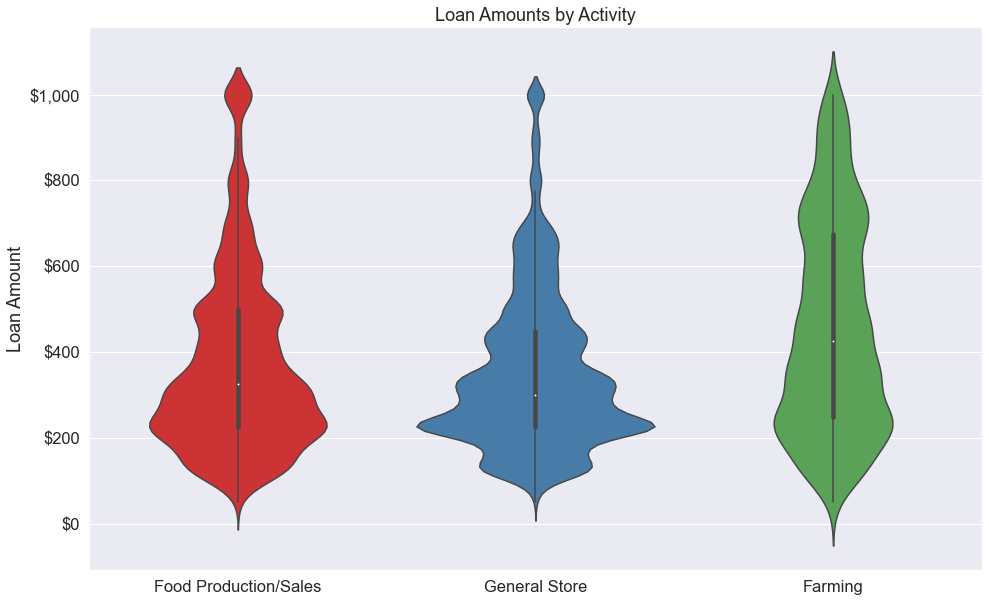

In [18]:
# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(16, 10))

# Use Seaborn to create the box plot
ax = sns.violinplot(data=df, x="activity", y="loan_amount")

# Label the y-axis and give a title
ax.set_title("Loan Amounts by Activity")
ax.set(xlabel=None)
ax.set_ylabel("Loan Amount")

# Edit the tick labels on the y-axis so that they include dollar signs.
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Save the figure as a .png file
plt.savefig('img_6_violin_plot_by_activity.png')

### Create a violin plot that visualizes the distribution of loan amount by country.

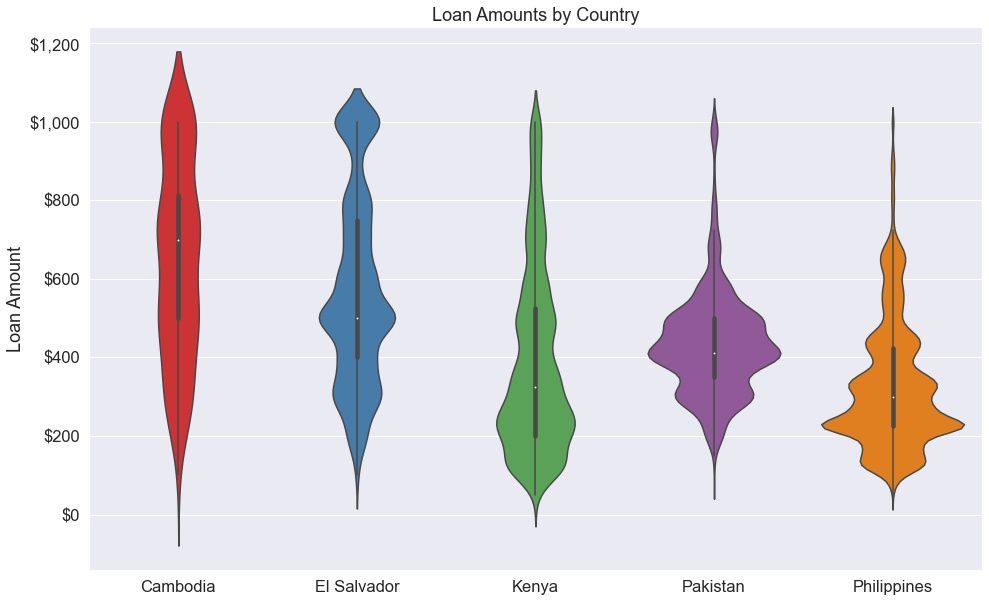

In [19]:
# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(16, 10))

# Use Seaborn to create the box plot
ax = sns.violinplot(data=df, x="country", y="loan_amount")

# Label the y-axis and give a title
ax.set_title("Loan Amounts by Country")
ax.set(xlabel=None)
ax.set_ylabel("Loan Amount")

# Edit the tick labels on the y-axis so that they include dollar signs.
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Save the figure as a .png file
plt.savefig('img_7_violin_plot_by_country.png')

## Step 7: Split Violin Plots

### Create a violin plot that visualizes the distribution of loan amount by country, split by gender.

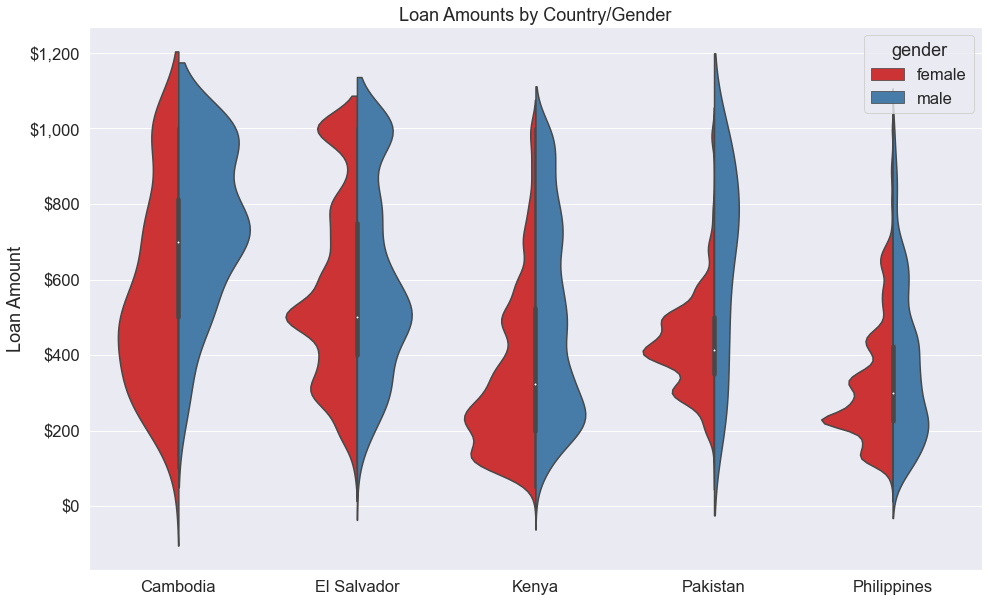

In [20]:
# Set style
sns.set_theme(font_scale=1.5, palette = 'Set1')
sns.set_style('darkgrid')

# Create figure and axis 
fig, ax = plt.subplots(figsize=(16, 10))

# Use Seaborn to create the box plot
ax = sns.violinplot(data=df, x="country", y="loan_amount", hue = "gender", split=True)

# Label the y-axis and give a title
ax.set_title("Loan Amounts by Country/Gender")
ax.set(xlabel=None)
ax.set_ylabel("Loan Amount")

# Edit the tick labels on the y-axis so that they include dollar signs.
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Save the figure as a .png file
plt.savefig('img_8_violin_plot_by_country_gender.png')